# ARTI308 - Machine Learning Lab 3: Exploratory Data Analysis (EDA) - Bank Marketing Dataset

# Mustafa Abbas
# 2240002889
# 6MA1

### The dataset contains information about direct marketing campaigns of a Portuguese bank. The goal is to predict if the client will subscribe to a term deposit (variable y).

### Before building models, we must understand:

### What does the bank data represent?

### Are there missing values?

### Are there outliers in age or duration?

### What patterns exist in customer behavior?

### Which variables influence the subscription (y)?

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [57]:
df = pd.read_csv("bankmarketing.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Check Missing Values

#### Dealing with missing values ​​and duplicates

In [58]:

df.replace('unknown', np.nan, inplace=True)
print("Missing values per column:\n", df.isnull().sum())
df.dropna(inplace=True)
print("\nNumber of duplicates before removal:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("\nFinal Data shape after cleaning:", df.shape)

Missing values per column:
 age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Number of duplicates before removal: 10

Final Data shape after cleaning: (30478, 21)


### Univariate Analysis

#### Distribution of the target variable - very important

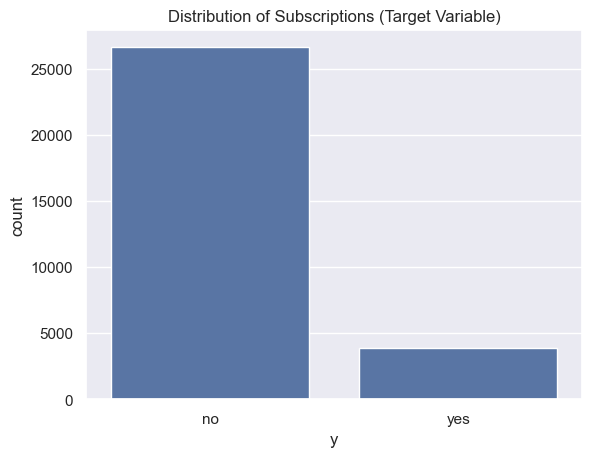

In [59]:
sns.countplot(x='y', data=df)
plt.title('Distribution of Subscriptions (Target Variable)')
plt.show()

#### Age distribution

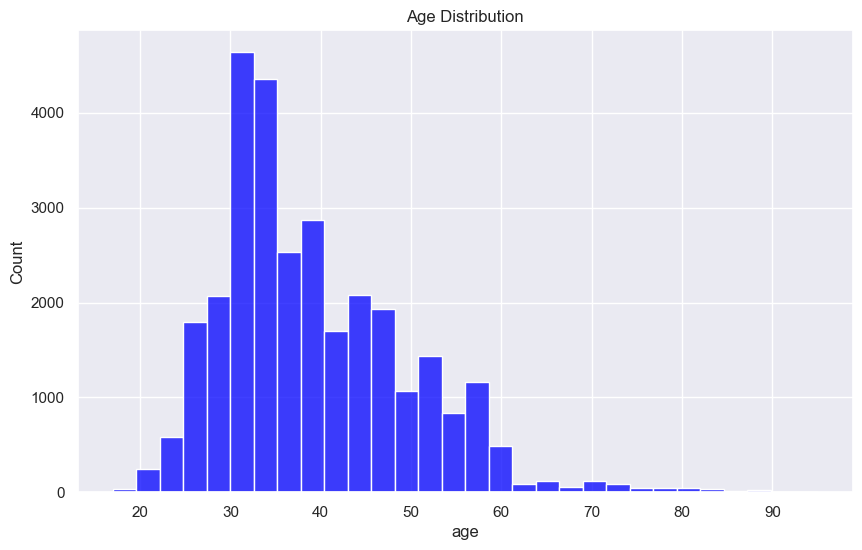

In [60]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=False, color='blue')
plt.title('Age Distribution')
plt.show()

### Outliers Detection

#### For ages and duration of call

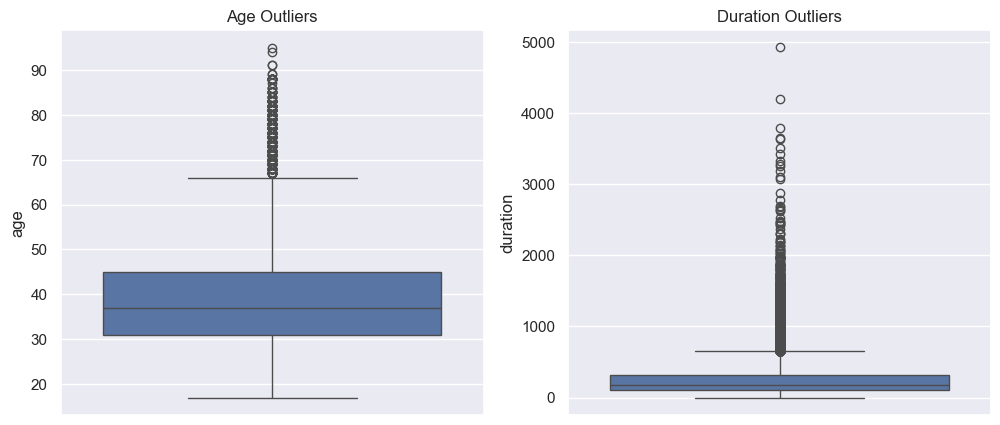

In [61]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['age'])
plt.title('Age Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['duration'])
plt.title('Duration Outliers')
plt.show()

Text(0.5, 1.0, 'Distribution of Jobs')

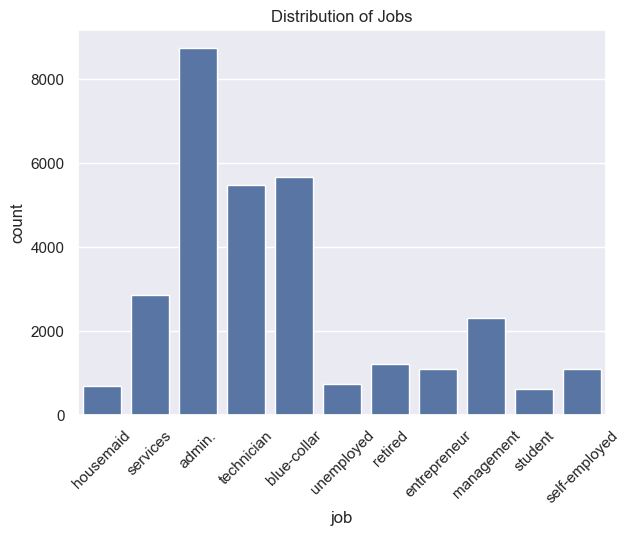

In [62]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='job', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Jobs')



C:\Users\musta\AppData\Local\Temp\ipykernel_29120\737467677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='marital', data=df, palette='viridis')


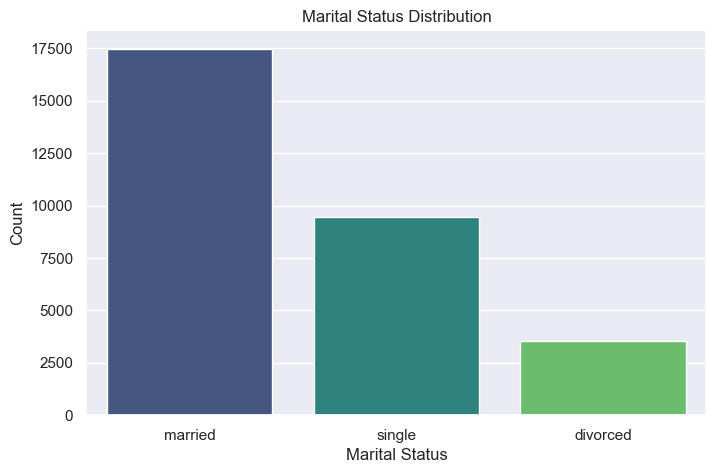

In [63]:
plt.figure(figsize=(8, 5)) 
sns.countplot(x='marital', data=df, palette='viridis') 
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

### Bivariate Analysis & Correlation

#### Correlation matrix

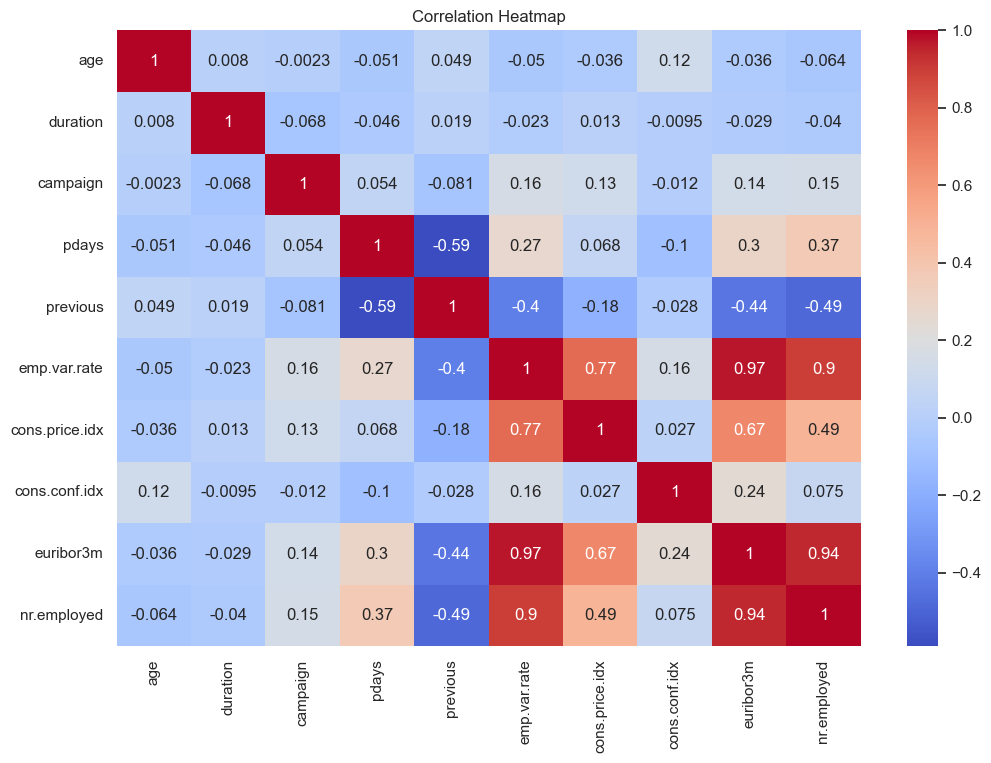

In [64]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### The relationship between employment and participation

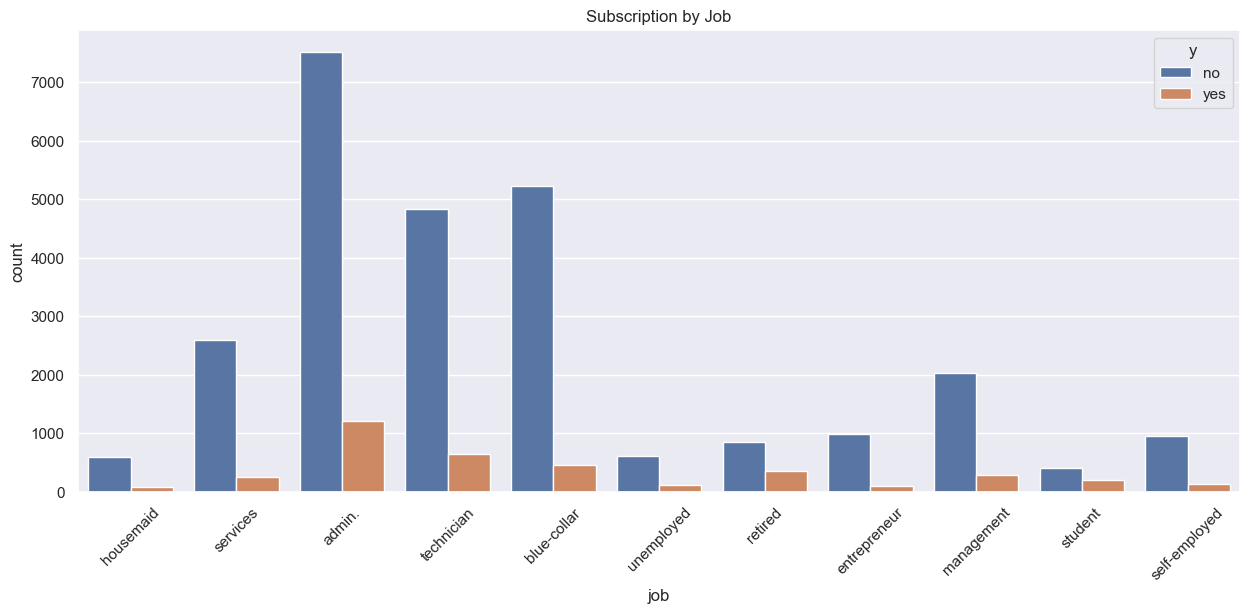

In [65]:
plt.figure(figsize=(15,6))
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.title('Subscription by Job')
plt.show()